In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas.plotting as pdplt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
nRow , nCol = data.shape

In [4]:
print(f'The dataset has {nRow} rows and {nCol} columns')

The dataset has 203 rows and 14 columns


*Let's take a quick look at what the data looks like:*

In [5]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1971,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1971,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1971,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1971,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1972,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
data.dtypes

year          int64
quarter       int64
realgdp     float64
realcons    float64
realinv     float64
realgovt    float64
realdpi     float64
cpi         float64
m1          float64
tbilrate    float64
unemp       float64
pop         float64
infl        float64
realint     float64
dtype: object

In [7]:
data.columns

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')

Data Visualization

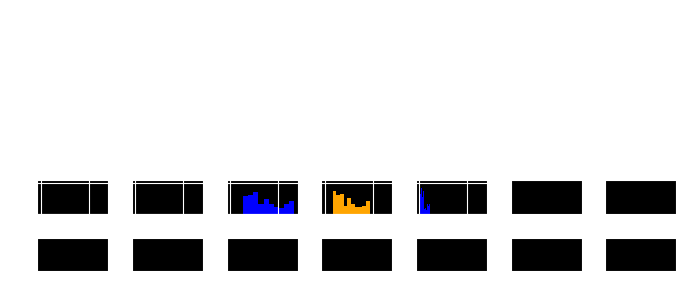

In [19]:
# Plot
fig, ax = plt.subplots(2,7,figsize=(7,2),sharex='all', sharey='all',dpi=100)
colors = ['red','green','blue','orange','blue']

for i, (ax, color) in enumerate(zip(ax.flatten(), colors)):
    data.iloc[:,i].hist(bins=10,ax=ax,color=color)
    ax.set_title(data.columns[i])
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle('Histogram of each variable',y=1.5,fontsize=15)
#ax.set_xlim(50,70);
#ax.set_ylim(0,1);
plt.tight_layout();
plt.show()

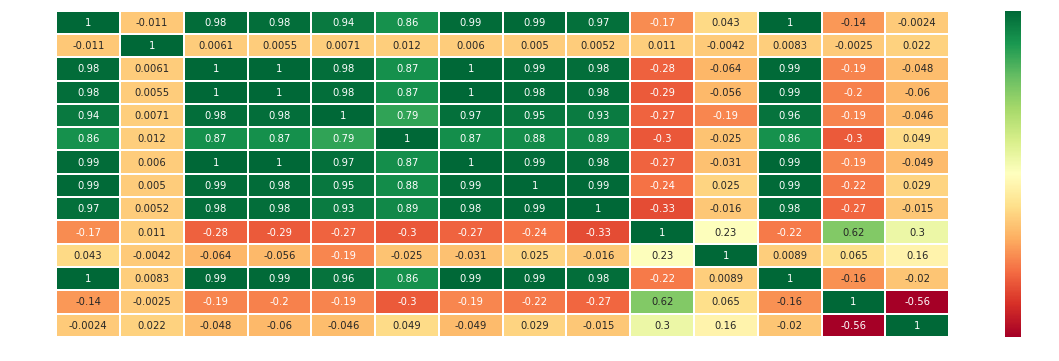

In [22]:
plt.figure(figsize=(20,6))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

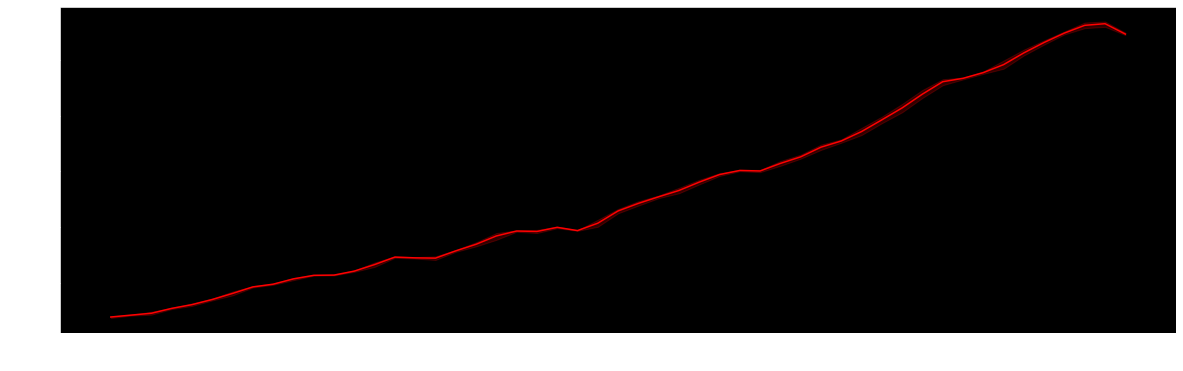

In [23]:
plt.figure(figsize=(20,6))
sns.lineplot(y=data['realgdp'],x=data['year'],data=data,color='red')
plt.show()

In [25]:
data_1 = data[['cpi','m1','tbilrate','unemp','pop', 'infl', 'realint']]

In [26]:
data_1.head(5)

,cpi,m1,tbilrate,unemp,pop,infl,realint
0,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [27]:
trans_data = np.log(data_1).diff().dropna()

In [29]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp,pop,infl,realint
188,0.006498,-0.000072,0.120003,-0.041673,0.002102,1.871802,-0.633831
189,0.009916,-0.008219,0.066477,0.000000,0.002362,0.423255,-0.809622
192,0.011458,0.004431,0.006079,0.022473,0.002185,0.327777,-1.504077
193,0.006863,-0.007055,-0.047579,0.000000,0.002446,-0.510098,1.699685
194,0.008620,0.006693,-0.165514,0.043485,0.002631,0.226773,-1.275871


Text(0.5, 1.0, 'Changes in log m1 vs. log unemp')

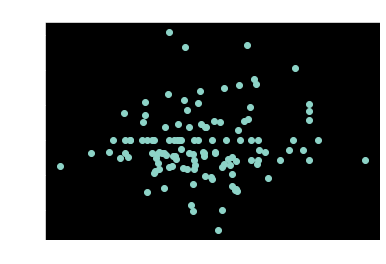

In [31]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In [32]:
data.year

0      1971
1      1971
2      1971
3      1971
4      1972
       ... 
198    2020
199    2020
200    2021
201    2021
202    2021
Name: year, Length: 203, dtype: int64

In [33]:
data.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [34]:
# Making the index as PeriodIndex so that become the primary key for their unique values for each period.
index = pd.PeriodIndex(year = data.year,quarter = data.quarter,freq = 'Q-Dec')
index

PeriodIndex(['1971Q1', '1971Q2', '1971Q3', '1971Q4', '1972Q1', '1972Q2',
             '1972Q3', '1972Q4', '1973Q1', '1973Q2',
             ...
             '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
             '2020Q4', '2021Q1', '2021Q2', '2021Q3'],
            dtype='period[Q-DEC]', length=203)

In [35]:
data.index = index  # Making the index as PeriodIndex which would be used for accessing the data in the future

In [36]:
data.infl

1971Q1    0.00
1971Q2    2.34
1971Q3    2.74
1971Q4    0.27
1972Q1    2.31
          ... 
2020Q3   -3.16
2020Q4   -8.79
2021Q1    0.94
2021Q2    3.37
2021Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

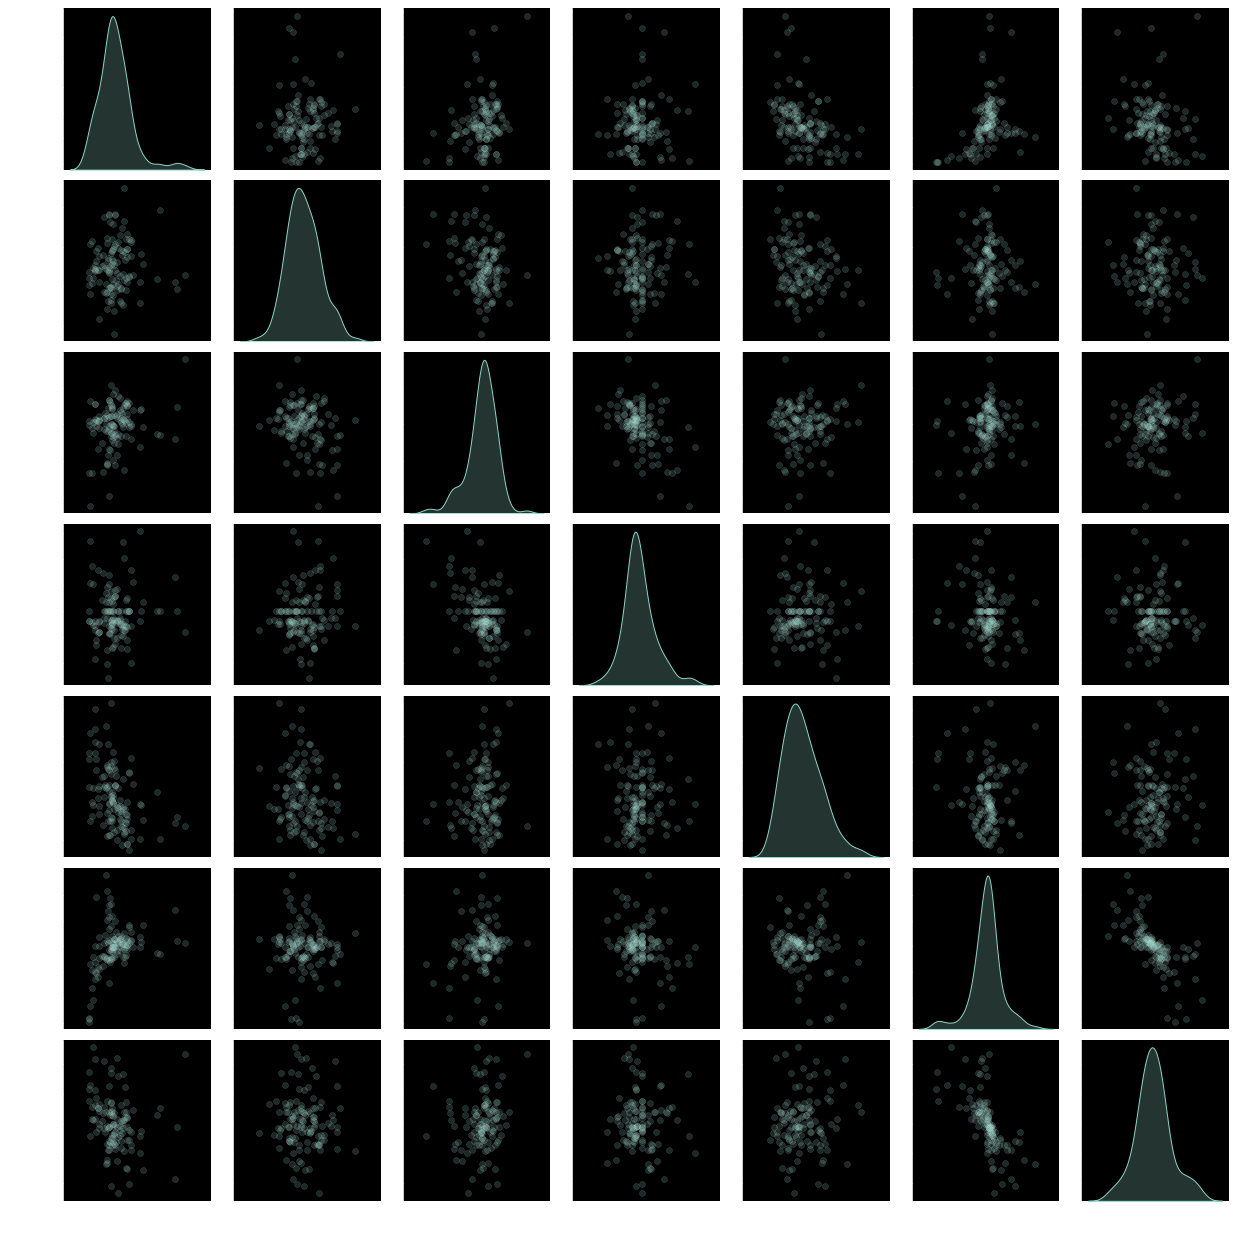

In [40]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

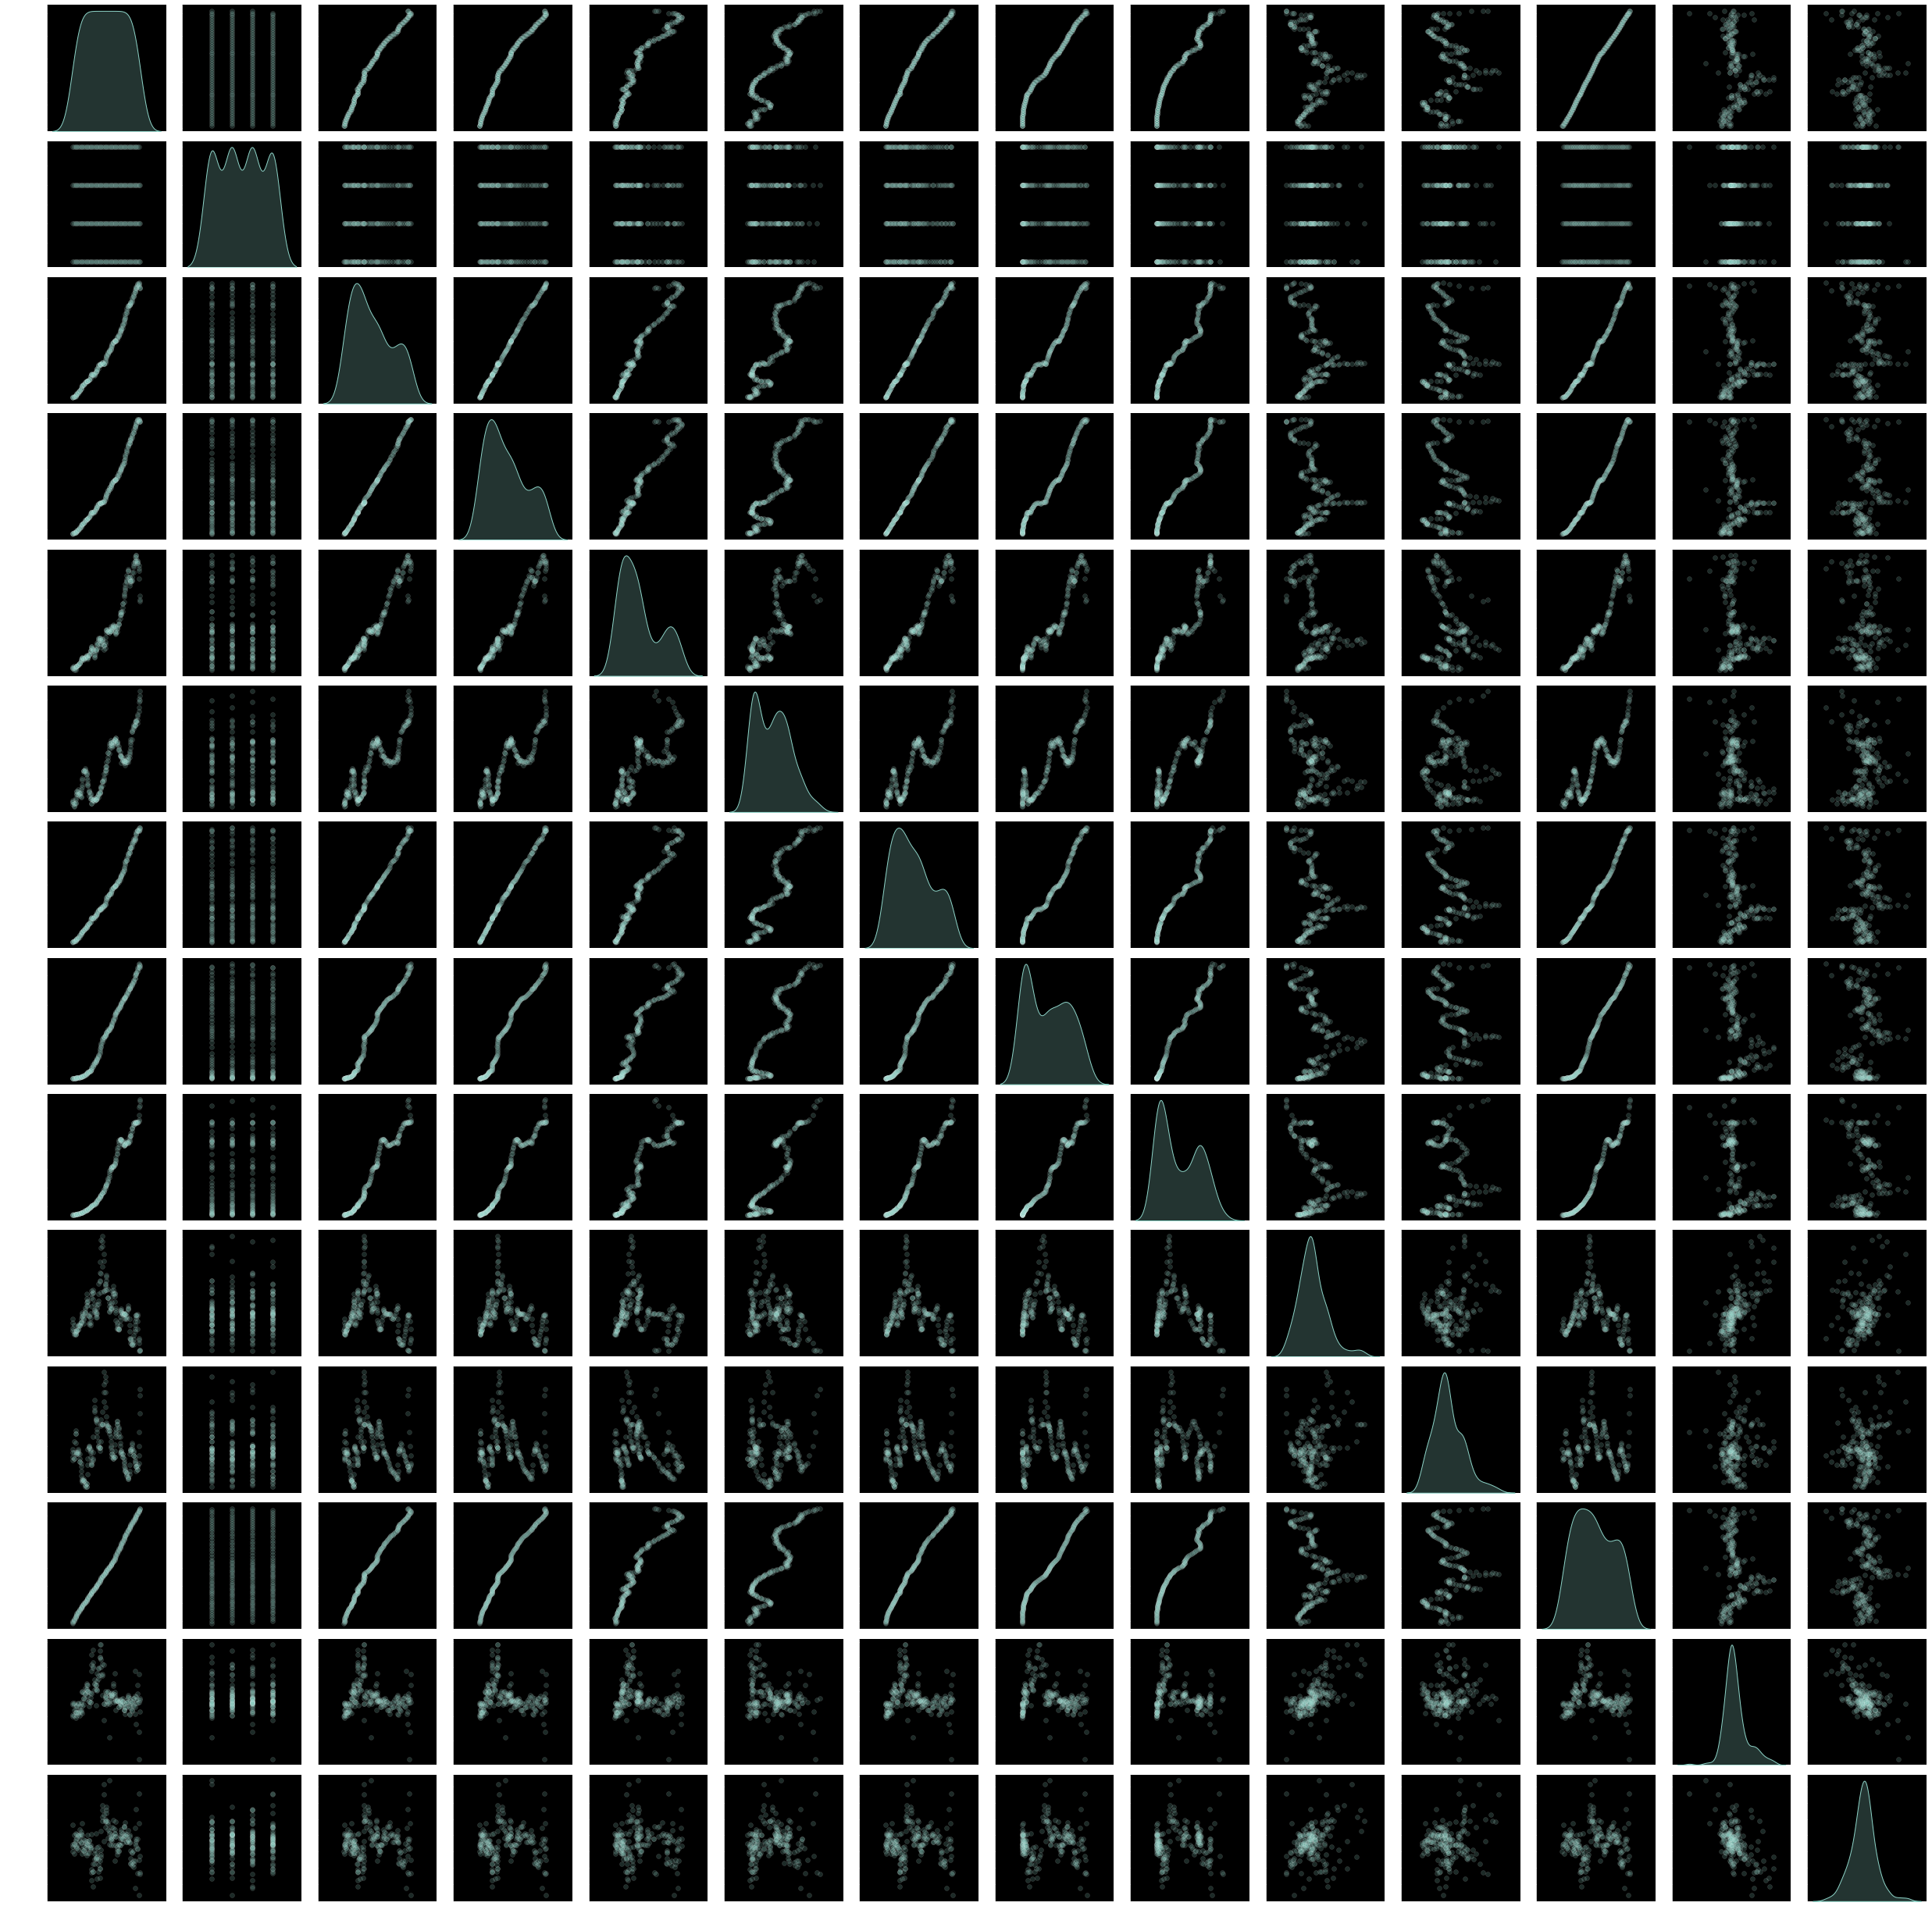

In [41]:
# More granular eda which passes configuration options to each individuals plotting calls on the off-diagonal elements.
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.2}) 

In [43]:
data.columns

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')

In [44]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1971Q1,1971,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1971Q2,1971,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1971Q3,1971,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1971Q4,1971,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1972Q1,1972,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


#### DATASET FEATURES

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adjusted).
        m1        - End of the quarter M1 nominal money stock (Seasonally
                    adjusted)
        tbilrate  - Quarterly monthly average of the monthly 3-month
                    treasury bill: secondary market rate
        unemp     - Seasonally adjusted unemployment rate (%)
        pop       - End of the quarter total population: all ages incl. armed
                    forces over seas
        infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
        realint   - Real interest rate (tbilrate - infl)

In [83]:
fig = px.line(data, x='year', y='realgdp', title='Time Series Trend Analysis')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [65]:
fig = px.scatter_matrix(data,
 dimensions=['realcons','realinv','realgovt','realdpi','cpi','m1','tbilrate','unemp','pop', 'infl', 'realint'],
 size_max=60,)
fig.show()

<AxesSubplot:>

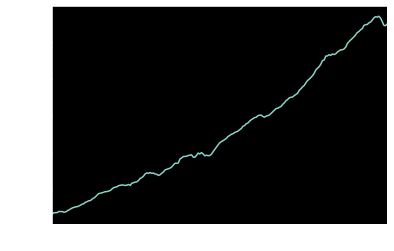

In [46]:
fig, ax = plt.subplots()
data['realgdp']["1971-03-31":].plot(ax=ax,fontsize=12)

In [62]:
px.sunburst(data, path=['year', 'quarter'], values='realgdp', color='realgdp',hover_name='year',height=500)

## The Hodrick–Prescott (HP) filter
### (Decompose the Settle price into trend and noise)

This a mathematical tool that is used in time series analysis and modelling. This filter is mainly useful in removing the cyclic component from time-series data. Applying the Hodrick–Prescott filter in time series allows us to obtain a smooth time series from time series that has time series components like trend cycle and noise in large quantities.

Mathematically, the basic idea behind this filter is related to concepts in the decomposition of time series. Let’s understand this mathematically by taking an example of time series yt.

Where,


In yt

t = 1, 2, 3,…..,T

𝛕t = trend component 

ct = cyclic component 

𝜺t = noise component .

The short-term fluctuations of the time series trend component can be adjusted by using a multiplier . the trend component of time series will solve:

![Getting Started](https://149695847.v2.pressablecdn.com/wp-content/uploads/2022/02/image-41.png)

First Terms of the above euqation penalizes the cyclic component
Second term of the equation penalizes the growth rate of the trend component i.e if increases that means penalty increases.

### The Hodrick-Prescott filter can be given by,
![Getting Started](https://149695847.v2.pressablecdn.com/wp-content/uploads/2022/02/image-42.png)

So, we can remove the smooth trend from our data. Where if 

T = trend and x = series then the module solves it as:

_min (sum((x[t] – T[t])**2 + lamb*((T[t+1] – T[t]) – (T[t] – T[t-1]))**2))_

* The 𝜆 value above handles variations in the growth rate of the trend component. 
* When analyzing quarterly data, the default lambda value of 1600 is recommended. 
* Use 6.25 for annual data, and 129,600 for monthly data.

The implementation of this filter can be compared to the ridge regression rule that uses _scipy.sparse_. By this, we can also write the solution from the module as 

_T = inv(I + lamb*K’K)x_

Where,

l = nobs

x = nobs identity matrix

k = (nobs-2) x nobs matrix

In [84]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle,gdp_trend = hpfilter(data['realgdp'], lamb=1600)

<AxesSubplot:>

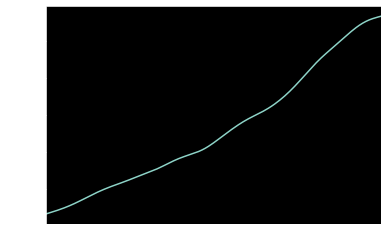

In [67]:
gdp_trend.plot()

<AxesSubplot:>

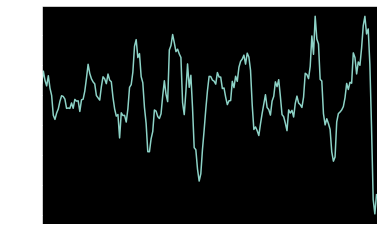

In [68]:
gdp_cycle.plot()

In [70]:
gdp_segregation = data[['realgdp']]

In [71]:
gdp_segregation['cycle']= gdp_cycle
gdp_segregation['trend'] = gdp_trend

C:\Users\Dell\AppData\Local\Temp/ipykernel_13588/41412469.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp/ipykernel_13588/41412469.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
gdp_segregation

,realgdp,cycle,trend
1971Q1,2710.349,39.511915,2670.837085
1971Q2,2778.801,80.088532,2698.712468
1971Q3,2775.488,48.875455,2726.612545
1971Q4,2785.204,30.591933,2754.612067
1972Q1,2847.699,64.882667,2782.816333
...,...,...,...
2020Q3,13324.600,102.018455,13222.581545
2020Q4,13141.920,-107.269472,13249.189472
2021Q1,12925.410,-349.047706,13274.457706
2021Q2,12901.504,-397.557073,13299.061073


In [74]:
gdp_segregation.columns

Index(['realgdp', 'cycle', 'trend'], dtype='object')

<AxesSubplot:>

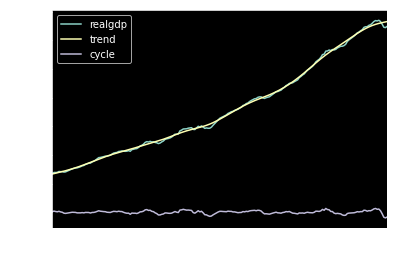

In [88]:
fig, ax = plt.subplots()
gdp_segregation[['realgdp', 'trend', 'cycle']]["1971-03-31":].plot(ax=ax,fontsize=12)

# Forecasting realgdp vs trend using an ARIMA Model

* ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm.
* An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

* ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, wo*rk best when the predictors are not correlated and are independent of each other.

* Q. So how to make a series stationary?

The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

* The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

Next, what are the ‘p’ and ‘q’ terms?

* ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. 
* And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

![Getting Started](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min.png)

In [90]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))

model = ARIMA(data['realgdp'], order=(5,1,1))

# Fit the model
model_fit = model.fit(disp=0)

D:\SW\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [91]:
# Output model summary results:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.realgdp   No. Observations:                  202
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1089.849
Method:                       css-mle   S.D. of innovations             53.282
Date:                Mon, 28 Mar 2022   AIC                           2195.697
Time:                        00:22:53   BIC                           2222.163
Sample:                    06-30-1971   HQIC                          2206.406
                         - 09-30-2021                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              51.1534      7.454      6.863      0.000      36.545      65.762
ar.L1.D.realgdp     0.1924      0.682      0.282      0.778      -1.143       1.528
ar.L2.D.realgdp     0.2375      0.247      0.963      0.335      -0.246       0.721
ar.L3.D.realgdp    -0.0333      0.145     -0.230      0.818      -0.317       0.250
ar.L4.D.realgdp     0.0806      0.094      0.855      0.392      -0.104       0.265
ar.L5.D.realgdp    -0.0596      0.096     -0.618      0.537      -0.249       0.129
ma.L1.D.realgdp     0.1608      0.681      0.236      0.813      -1.174       1.496
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4293           -0.0000j            1.4293           -0.5000
AR.2           -0.3372           -1.8816j            1.9116           -0.2782
AR.3           -0.3372           +1.8816j            1.9116            0.2782
AR.4            1.7278           -0.4740j            1.7917           -0.0426
AR.5            1.7278           +0.4740j            1.7917            0.0426
MA.1           -6.2191           +0.0000j            6.2191            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Futures gdp Forecast'}>

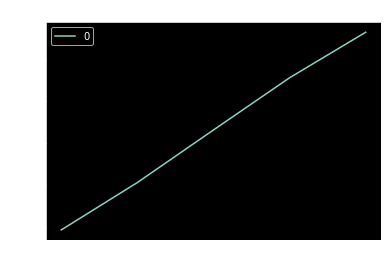

In [94]:
# Plot the 5 Year or Quarter Price Forecast
# YOUR CODE HERE!

pd.DataFrame(model_fit.forecast(steps=5)[0]).plot(title="5 Futures gdp Forecast")

The model predicts that the realGdp will increase in near term.

### THANKS ######